# COVID-19 INDIA DATA ANALYSIS

## Prepared by amar shilvanth

In [123]:
# importing all libraries 

import numpy as np, pandas as pd 
import matplotlib.pyplot as plt, seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 
pd.pandas.set_option('display.max_columns', None)

In [124]:
# Loading the dataset
daily_df=pd.read_csv(r'F:\DataScience_Upgrad\Projects\covid19 india\covid_19_india.csv')
daily_df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [125]:
daily_df.shape

(18110, 9)

In [126]:
# Removing unwanted columns 
daily_df.drop(['Sno','Date','Time'], axis=1, inplace=True)

In [127]:
daily_df.head()

,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,Kerala,1,0,0,0,1
1,Kerala,1,0,0,0,1
2,Kerala,2,0,0,0,2
3,Kerala,3,0,0,0,3
4,Kerala,3,0,0,0,3


In [128]:
daily_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   State/UnionTerritory      18110 non-null  object
 1   ConfirmedIndianNational   18110 non-null  object
 2   ConfirmedForeignNational  18110 non-null  object
 3   Cured                     18110 non-null  int64 
 4   Deaths                    18110 non-null  int64 
 5   Confirmed                 18110 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 849.0+ KB


In [129]:
daily_df.describe()

,Cured,Deaths,Confirmed
count,1.811000e+04,18110.000000,1.811000e+04
mean,2.786375e+05,4052.402264,3.010314e+05
std,6.148909e+05,10919.076411,6.561489e+05
min,0.000000e+00,0.000000,0.000000e+00
25%,3.360250e+03,32.000000,4.376750e+03
50%,3.336400e+04,588.000000,3.977350e+04
75%,2.788698e+05,3643.750000,3.001498e+05
max,6.159676e+06,134201.000000,6.363442e+06


In [130]:
for i in daily_df.columns:
    print(i, '{}'.format(daily_df[i].nunique()))

State/UnionTerritory 46
ConfirmedIndianNational 62
ConfirmedForeignNational 12
Cured 14445
Deaths 6471
Confirmed 14971


In [131]:
for i in daily_df.columns:
    print('-------',i,'-------', '\n', daily_df[i].value_counts())

------- State/UnionTerritory ------- 
 Kerala                                      560
Delhi                                       528
Rajasthan                                   527
Uttar Pradesh                               526
Haryana                                     526
Ladakh                                      523
Tamil Nadu                                  523
Punjab                                      521
Jammu and Kashmir                           521
Maharashtra                                 520
Karnataka                                   520
Andhra Pradesh                              518
Uttarakhand                                 515
Odisha                                      514
Puducherry                                  512
West Bengal                                 512
Chhattisgarh                                511
Chandigarh                                  511
Gujarat                                     510
Himachal Pradesh                            508
M

In [132]:
# features with categorical
cat_f=[feature for feature in daily_df.columns if daily_df[feature].nunique()<70]
cat_f

['State/UnionTerritory', 'ConfirmedIndianNational', 'ConfirmedForeignNational']

In [133]:
# Handling the categorical features 
daily_df['State/UnionTerritory'].value_counts()

Kerala                                      560
Delhi                                       528
Rajasthan                                   527
Uttar Pradesh                               526
Haryana                                     526
Ladakh                                      523
Tamil Nadu                                  523
Punjab                                      521
Jammu and Kashmir                           521
Maharashtra                                 520
Karnataka                                   520
Andhra Pradesh                              518
Uttarakhand                                 515
Odisha                                      514
Puducherry                                  512
West Bengal                                 512
Chhattisgarh                                511
Chandigarh                                  511
Gujarat                                     510
Himachal Pradesh                            508
Madhya Pradesh                          

In [134]:
daily_df['State/UnionTerritory']=daily_df['State/UnionTerritory'].apply(lambda x: x.replace('*',' '))

In [135]:
daily_df['State/UnionTerritory']=daily_df['State/UnionTerritory'].apply(lambda x: x.replace('Karanataka','Karnataka'))

In [136]:
daily_df['State/UnionTerritory'].value_counts()

Kerala                                      560
Delhi                                       528
Rajasthan                                   527
Uttar Pradesh                               526
Haryana                                     526
Ladakh                                      523
Tamil Nadu                                  523
Punjab                                      521
Jammu and Kashmir                           521
Karnataka                                   521
Maharashtra                                 520
Andhra Pradesh                              518
Uttarakhand                                 515
Odisha                                      514
Puducherry                                  512
West Bengal                                 512
Chhattisgarh                                511
Chandigarh                                  511
Gujarat                                     510
Himachal Pradesh                            508
Madhya Pradesh                          

In [137]:
daily_df['State/UnionTerritory'].unique()

array(['Kerala', 'Telengana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
       'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra',
       'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand',
       'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh',
       'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
       'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
       'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh',
       'Tripura', 'Nagaland', 'Meghalaya',
       'Dadra and Nagar Haveli and Daman and Diu',
       'Cases being reassigned to states', 'Sikkim', 'Daman & Diu',
       'Lakshadweep', 'Telangana', 'Dadra and Nagar Haveli', 'Bihar    ',
       'Madhya Pradesh   ', 'Himanchal Pradesh', 'Maharashtra   '],
      dtype=object)

In [138]:
daily_df=daily_df[(daily_df['State/UnionTerritory']!='Daman & Diu') & (daily_df['State/UnionTerritory']!='Unassigned') & (daily_df['State/UnionTerritory']!='Dadra and Nagar Haveli') & (daily_df['State/UnionTerritory']!='Bihar    ') & (daily_df['State/UnionTerritory']!='Madhya Pradesh   ') & (daily_df['State/UnionTerritory']!='Himanchal Pradesh') & (daily_df['State/UnionTerritory']!='Maharashtra   ') & (daily_df['State/UnionTerritory']!='Cases being reassigned to states')]

In [139]:
daily_df.ConfirmedForeignNational.value_counts()

-     17593
0       314
1        39
2        36
14       25
3        12
10        6
8         5
7         3
6         3
11        2
9         1
Name: ConfirmedForeignNational, dtype: int64

In [140]:
daily_df

,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,Kerala,1,0,0,0,1
1,Kerala,1,0,0,0,1
2,Kerala,2,0,0,0,2
3,Kerala,3,0,0,0,3
4,Kerala,3,0,0,0,3
...,...,...,...,...,...,...
18105,Telangana,-,-,638410,3831,650353
18106,Tripura,-,-,77811,773,80660
18107,Uttarakhand,-,-,334650,7368,342462
18108,Uttar Pradesh,-,-,1685492,22775,1708812


In [141]:
daily_df.head(50)

,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,Kerala,1,0,0,0,1
1,Kerala,1,0,0,0,1
2,Kerala,2,0,0,0,2
3,Kerala,3,0,0,0,3
4,Kerala,3,0,0,0,3
5,Kerala,3,0,0,0,3
6,Kerala,3,0,0,0,3
7,Kerala,3,0,0,0,3
8,Kerala,3,0,0,0,3
9,Kerala,3,0,0,0,3


In [142]:
daily_df.drop('ConfirmedIndianNational', axis=1, inplace=True)

In [143]:
daily_df.drop('ConfirmedForeignNational', axis=1, inplace=True)

In [144]:
daily_df.head()

,State/UnionTerritory,Cured,Deaths,Confirmed
0,Kerala,0,0,1
1,Kerala,0,0,1
2,Kerala,0,0,2
3,Kerala,0,0,3
4,Kerala,0,0,3


In [145]:
# features with numerics 

In [146]:
num_f=[feature for feature in daily_df.columns if daily_df[feature].dtype!='O' and feature not in cat_f]
num_f

['Cured', 'Deaths', 'Confirmed']

In [147]:
cat_f=[feature for feature in daily_df.columns if daily_df[feature].dtype=='O']
cat_f

['State/UnionTerritory']

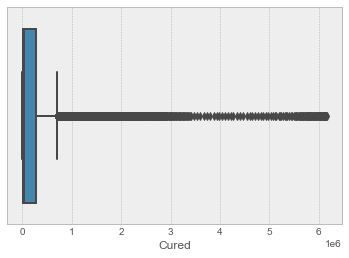

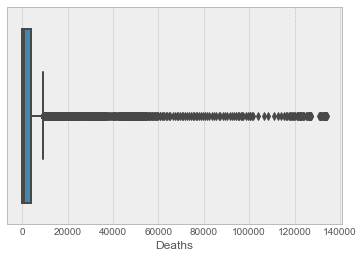

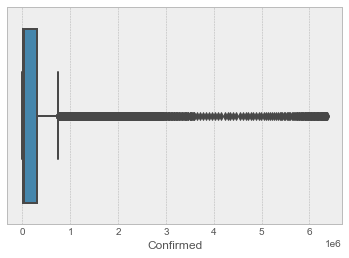

In [148]:
# Handling the numeric features
# finding outliers

for i in num_f:
    sns.boxplot(data=daily_df, x=i)
    plt.show()

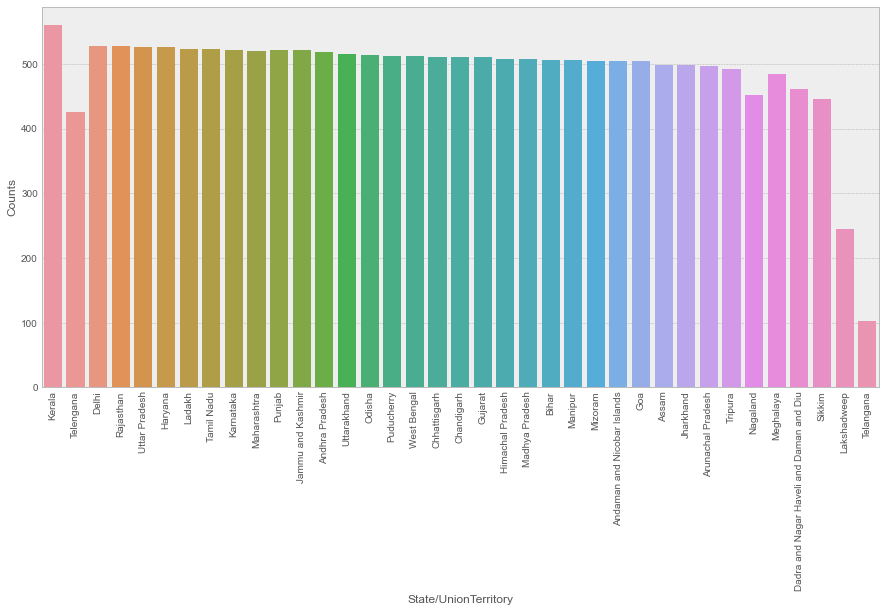

In [149]:
# categorical univariate analysis
plt.figure(figsize=(15,7))
sns.countplot(data=daily_df, x='State/UnionTerritory')
plt.xlabel('State/UnionTerritory')
plt.ylabel('Counts')
plt.xticks(rotation=90)
plt.show()

### Observations
From the observations kerala state has the highest cases in the country 

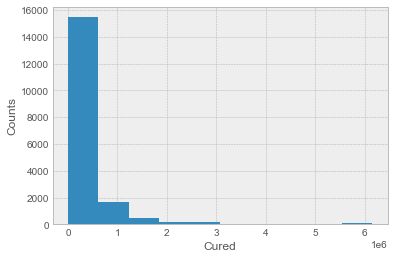

In [150]:
# visualizations 
# Numerical univariate analysis 
plt.hist(data=daily_df, x='Cured')
plt.xlabel('Cured')
plt.ylabel('Counts')
plt.show()

### Observations  
The highest distributon count for cure is between 0-1.5

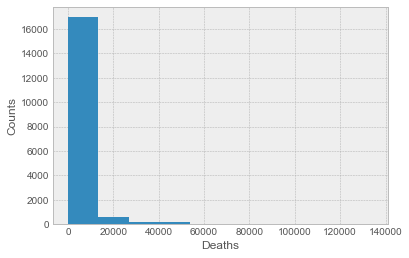

In [151]:
plt.hist(data=daily_df, x='Deaths')
plt.xlabel('Deaths')
plt.ylabel('Counts')
plt.show()

### Observations 
 the highest deaths frequency is between 0-2000

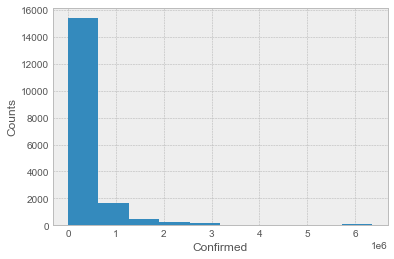

In [152]:
plt.hist(data=daily_df, x='Confirmed')
plt.xlabel('Confirmed')
plt.ylabel('Counts')
plt.show()

In [153]:
# Observations 
# the confirmed frequency is between 0-2

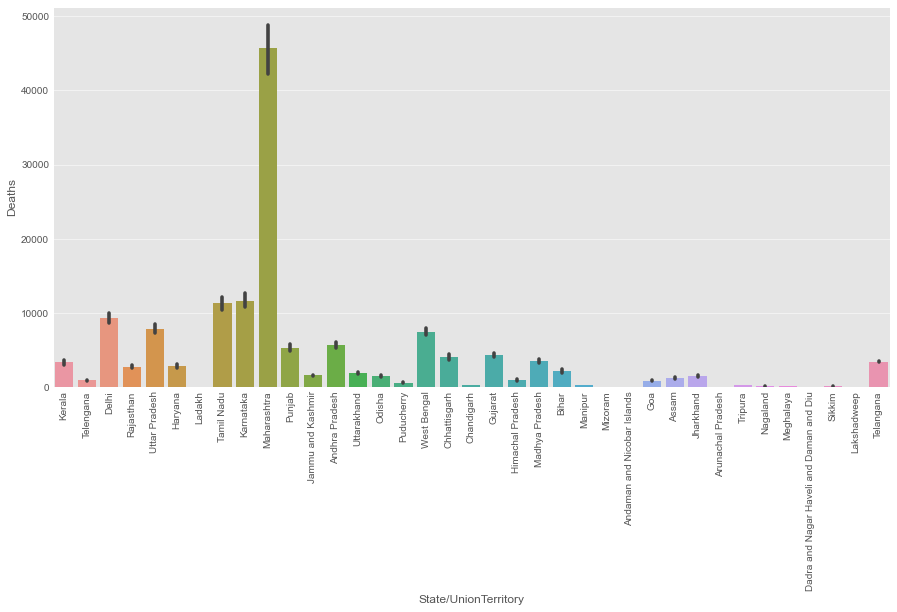

In [154]:
# Numerical vs Categorical analysis 
plt.figure(figsize=(15,7))
plt.style.use('ggplot')
sns.barplot(data=daily_df, x='State/UnionTerritory', y='Deaths')
plt.xlabel('State/UnionTerritory')
plt.ylabel('Deaths')
plt.xticks(rotation=90)
plt.show()

### Observations
From the observations maharastra has the highest death rate in the country 

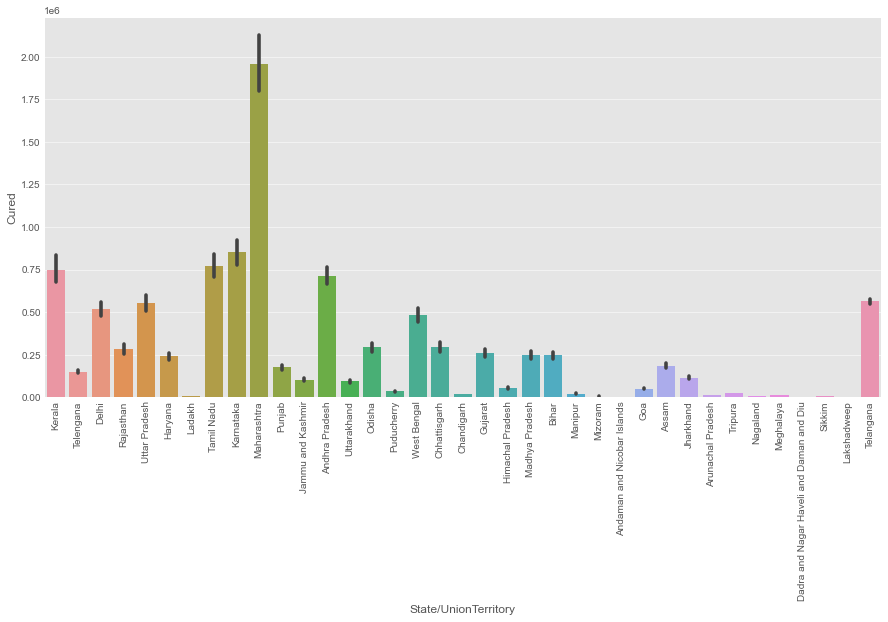

In [155]:
plt.figure(figsize=(15,7))
plt.style.use('ggplot')
sns.barplot(data=daily_df, x='State/UnionTerritory', y='Cured')
plt.xlabel('State/UnionTerritory')
plt.ylabel('Cured')
plt.xticks(rotation=90)
plt.show()

### Observations
from the observations maharastra has the highest recovery

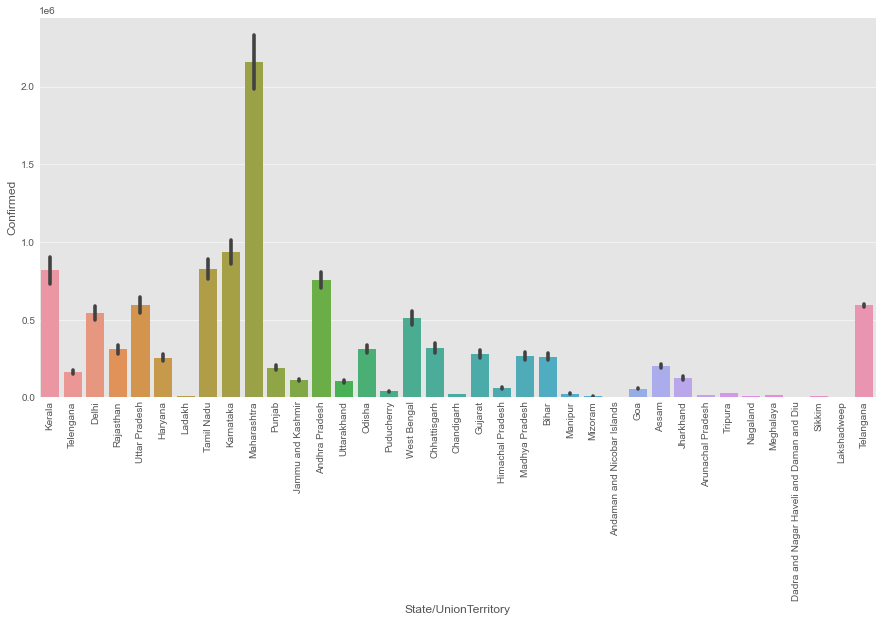

In [156]:
plt.figure(figsize=(15,7))
plt.style.use('ggplot')
sns.barplot(data=daily_df, x='State/UnionTerritory', y='Confirmed')
plt.xlabel('State/UnionTerritory')
plt.ylabel('Confirmed')
plt.xticks(rotation=90)
plt.show()

### Observations
From the observations maharastra has highest confirmation rate

### Multivariate Analysis


In [157]:
daily_df.corr().style.background_gradient(cmap='coolwarm')

,Cured,Deaths,Confirmed
Cured,1.000000,0.917128,0.997741
Deaths,0.917128,1.000000,0.917996
Confirmed,0.997741,0.917996,1.000000


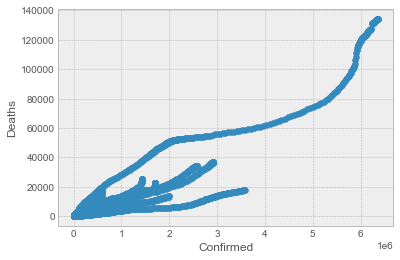

In [158]:
plt.style.use('bmh')
plt.scatter(data=daily_df, x='Confirmed', y='Deaths')
plt.xlabel('Confirmed')
plt.ylabel('Deaths')
plt.show()

### Observations

From the observations we can see that the death rate were increses after confirmed cases crosses 5 